In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
from model import Deeplabv3
from keras.models import Model
from keras.layers import Conv2D, Lambda, Activation
from keras.models import load_model
from keras.optimizers import Adam
%matplotlib inline


K.clear_session()
# model = load_model("C:/Users/Administrator/Desktop/deeplab/face_model_transfered.h5")
classes = 2
base_model = Deeplabv3(backbone="xception")
transfered_model = Model(inputs=base_model.input, outputs=base_model.get_layer("decoder_conv1_pointwise_activation").output)
# for layer in transfered_model.layers:
#     layer.trainable = False

x = Conv2D(classes, (1, 1), padding="same", name="logits_semantic")(transfered_model.output)
# size = tf.int_shape(transfered_model.input)
size_before4 = K.int_shape(transfered_model.input)
# x = Lambda(lambda xx: tf.image.resize(xx, size_before4[1:3], method="bilinear", align_corners=True))(x)
x = Lambda(lambda xx: tf.image.resize(xx, size_before4[1:3], method="bilinear", align_corners=True))(x)
x = Activation("sigmoid")(x)
model = Model(inputs=transfered_model.input, outputs=x)
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\f

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\keras\lib\site-package


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
entry_flow_conv1_1 (Conv2D)     (None, 256, 256, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
entry_flow_conv1_1_BN (BatchNor (None, 256, 256, 32) 128         entry_flow_conv1_1[0][0]         
________________________________________________________________________________________________

In [2]:
model.load_weights("C:/Users/Administrator/Desktop/deeplab/face_model_transfered_weights.h5")

In [3]:
# model.save("C:/Users/Administrator/Desktop/deeplab/face_model_transfered_1.h5

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
entry_flow_conv1_1 (Conv2D)     (None, 256, 256, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
entry_flow_conv1_1_BN (BatchNor (None, 256, 256, 32) 128         entry_flow_conv1_1[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 32) 0           entry_flow_conv1_1_BN[0][0]      
__________________________________________________________________________________________________
entry_flow

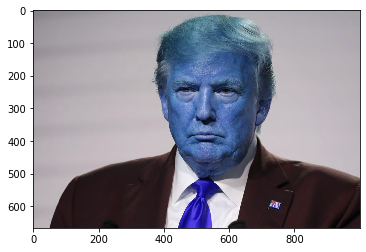

In [5]:
img_to_test = cv2.imread("C:/Users/Administrator/Desktop/deeplab/img_to_test.jpg")
# cv2.imshow('img_to_test', img_to_test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img_to_test)

In [6]:
img_to_test = cv2.resize(img_to_test, (512, 512), interpolation=cv2.INTER_CUBIC)

In [7]:
img_to_test = img_to_test / 127.5 - 1

In [8]:
img_to_test = np.expand_dims(img_to_test, axis=0)

In [9]:
res = model.predict(img_to_test)

In [10]:
res.shape

(1, 512, 512, 2)

In [11]:
res[0, :, :, 0].shape

(512, 512)

In [12]:
np.where(res[0, :, :, 0] > 0.5)

(array([  0,   0,   0, ..., 511, 511, 511], dtype=int64),
 array([  0,   1,   2, ..., 509, 510, 511], dtype=int64))

In [13]:
np.where(res[0, :, :, 1] > 0.5)

(array([  0,   0,   0, ..., 511, 511, 511], dtype=int64),
 array([ 4,  5,  6, ..., 20, 21, 22], dtype=int64))

In [14]:
mask = np.uint8(res[0, :, :, 0] > 0.5)

In [15]:
mask.shape

(512, 512)

In [16]:
img_to_test = cv2.imread("C:/Users/Administrator/Desktop/deeplab/img_to_test.jpg")
img_to_test = cv2.resize(img_to_test, (512, 512), interpolation=cv2.INTER_CUBIC)
img_to_test.shape

(512, 512, 3)

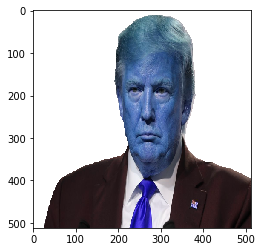

In [17]:
mask = np.uint8(res[0, :, :, 0] > 0.8)

inversed_mask = 1 - mask

bg = np.ones((512, 512, 3), dtype="uint8") * 255
masked_img = cv2.bitwise_and(img_to_test, img_to_test, mask=mask)
masked_bg = cv2.bitwise_and(bg, bg, mask=inversed_mask)
composed_img = cv2.add(masked_img, masked_bg) 
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(composed_img)

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
from model import Deeplabv3
from keras.models import Model
from keras.layers import Conv2D, Lambda, Activation
from keras.models import load_model
from keras.optimizers import Adam
%matplotlib inline


K.clear_session()

model = Deeplabv3(classes=2, backbone="xception", activation="sigmoid")
model.load_weights("C:/Users/Administrator/Desktop/deeplab/face_model_weights.h5")
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
entry_flow_conv1_1 (Conv2D)     (None, 256, 256, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
entry_flow_conv1_1_BN (BatchNor (None, 256, 256, 32) 128         entry_flow_conv1_1[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 32) 0           entry_flow_conv1_1_BN[0][0]      
__________________________________________________________________________________________________
entry_flow

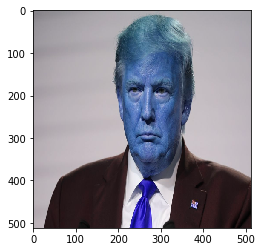

In [19]:
img_to_test = cv2.imread("C:/Users/Administrator/Desktop/deeplab/img_to_test.jpg")
img_to_test = cv2.resize(img_to_test, (512, 512), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_to_test)

In [20]:
img_to_test_n = img_to_test / 127.5 - 1
img_to_test_n = np.expand_dims(img_to_test_n, axis=0)
res = model.predict(img_to_test_n)

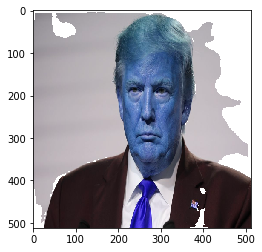

In [21]:
mask = np.uint8(res[0, :, :, 0] > 0.92)
inversed_mask = 1 - mask
# inversed_mask = np.uint8(res[0, :, :, 1] > 0.90)
bg = np.ones((512, 512, 3), dtype="uint8") * 255
masked_img = cv2.bitwise_and(img_to_test, img_to_test, mask=mask)
masked_bg = cv2.bitwise_and(bg, bg, mask=inversed_mask)
composed_img = cv2.add(masked_img, masked_bg) 
plt.imshow(composed_img)

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
from model import Deeplabv3
from keras.models import Model
from keras.layers import Conv2D, Lambda, Activation
from keras.models import load_model
from keras.optimizers import Adam
%matplotlib inline

K.clear_session()

model_transfered = Deeplabv3(classes=2, backbone="xception", activation="sigmoid")
model_transfered.load_weights("C:/Users/Administrator/Desktop/deeplab/face_model_transfered_weights.h5")
model_transfered.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
entry_flow_conv1_1 (Conv2D)     (None, 256, 256, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
entry_flow_conv1_1_BN (BatchNor (None, 256, 256, 32) 128         entry_flow_conv1_1[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 32) 0           entry_flow_conv1_1_BN[0][0]      
__________________________________________________________________________________________________
entry_flow

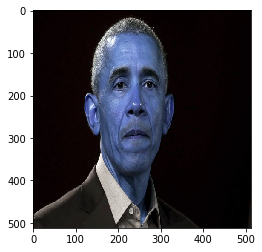

In [23]:
img_to_test = cv2.imread("C:/Users/Administrator/Desktop/deeplab/img_to_test_1.jpg")
img_to_test = cv2.resize(img_to_test, (512, 512), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_to_test)

In [24]:
img_to_test_n = img_to_test / 127.5 - 1
img_to_test_n = np.expand_dims(img_to_test_n, axis=0)
res = model_transfered.predict(img_to_test_n)

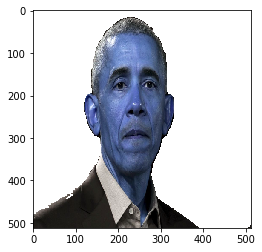

In [25]:
mask = np.uint8(res[0, :, :, 0] > 0.8)
inversed_mask = 1 - mask
# inversed_mask = np.uint8(res[0, :, :, 1] > 0.90)
bg = np.ones((512, 512, 3), dtype="uint8") * 255
masked_img = cv2.bitwise_and(img_to_test, img_to_test, mask=mask)
masked_bg = cv2.bitwise_and(bg, bg, mask=inversed_mask)
composed_img = cv2.add(masked_img, masked_bg) 
plt.imshow(composed_img)

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
from model import Deeplabv3
from keras.models import Model
from keras.layers import Conv2D, Lambda, Activation
from keras.models import load_model
from keras.optimizers import Adam
%matplotlib inline


K.clear_session()

model = Deeplabv3(classes=2, backbone="xception", activation="sigmoid")
model.load_weights("C:/Users/Administrator/Desktop/deeplab/face_model_weights.h5")
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
entry_flow_conv1_1 (Conv2D)     (None, 256, 256, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
entry_flow_conv1_1_BN (BatchNor (None, 256, 256, 32) 128         entry_flow_conv1_1[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 32) 0           entry_flow_conv1_1_BN[0][0]      
__________________________________________________________________________________________________
entry_flow

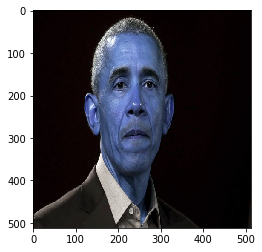

In [27]:
img_to_test = cv2.imread("C:/Users/Administrator/Desktop/deeplab/img_to_test_1.jpg")
img_to_test = cv2.resize(img_to_test, (512, 512), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_to_test)

In [28]:
img_to_test_n = img_to_test / 127.5 - 1
img_to_test_n = np.expand_dims(img_to_test_n, axis=0)
res = model.predict(img_to_test_n)

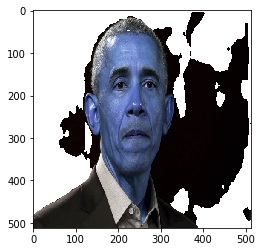

In [29]:
mask = np.uint8(res[0, :, :, 0] > 0.8)
inversed_mask = 1 - mask
# inversed_mask = np.uint8(res[0, :, :, 1] > 0.90)
bg = np.ones((512, 512, 3), dtype="uint8") * 255
masked_img = cv2.bitwise_and(img_to_test, img_to_test, mask=mask)
masked_bg = cv2.bitwise_and(bg, bg, mask=inversed_mask)
composed_img = cv2.add(masked_img, masked_bg) 
plt.imshow(composed_img)